In [78]:
from nltk.corpus import stopwords
import re
import numpy as np
import pandas as pd
import spacy
from nltk.stem import SnowballStemmer
from sklearn.cluster import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.manifold import TSNE
import matplotlib.cm as cm
%matplotlib inline

In [2]:
raw_words = 'eine, Computeranimation, auf, einem, schroffen, Berg, mit, schneebedeckter, Flanke, fliegt, eine, Reihe, Sterne, zu, sie, bilden, an, den, Kranz, um, den, Gipfel, Paramount, vor, Himmel, schwebt, eine, Feder, durch, die, in, einer, Stadt, segelt, sie, die, Baumkronen, alles, ein, Robert, Zemeckis, Filme, Tom, Hanks, als, Forrest, die, Feder, fliegt, ein, paar, Meter, den, Wipfeln, Robin, Wright, hat, Jenny, Gary, Cinis, als, Lieutenant, denn, die, Williamson, als, Barber, und, Sally, field, als, misses, Gump, Musik, Alan, Silvestri, Drehbuch, Eric, Ross, nach, dem, gleichnamigen, Roman, von, Winston, groom, Regie, Robert, Zemeckis, in, der, eines, Kirchturms, singt, die, Feder, vor, einem, langsam, die, wurde, produziert, vom, Bayerischen, Rundfunk, im, Auftrag, des, Schweizer, Fernsehens, text, Code, Michalski, und, Beckmann, Film, e.v., redaktionell, mal, durch, und, Bernd, Benecke, Tonmischung, Herbert, Glaser, Sprecher, Thomas, die, Feder, Trudel, zu, einer, in, unserer, die, durch, den, Park, ein, Mann, bleibt, kurz, am, Bordstein, stehen, die, Feder, landet, sanft, auf, seinem, der, Mann, die, Fahrbahn, die, Feder, schwebt, weiter, die, Windschutzscheibe, eines, Chevrolets, sie, singt, bist, nicht, den, Asphalt, und, fliegt, unter, einem, Wagen, hindurch, der, an, einer, Bushaltestelle, vorbei, die, Feder, wird, wieder, hoch, gewirbelt, und, Trudel, zu, einem, Mann, auf, einer, Seite, Bank, sie, landet, an, einem, seiner, abgewetzten, Nike, der, Mann, hebt, sie, auf, und, betrachtete, er, ist, etwa, schlank, und, braun, gebrannt, und, hat, kleine, dunkle, Augen, ein, kurzes, dunkles, Haar, mit, Geheimratsecken, ist, den, Ohren, ausrasiert, er, einen, hellen, Anzug, und, ein, blau, kariertes, Hemd, der, Mann, und, eine, Pralinenschachtel, von, einem, kleinen, Koffer, und, R, zwischen, den, akkurat, gepackten, Sachen, liegen, auch, ein, rotes, Cappy, und, ein, aus, dem, Kofferdeckel, zieht, der, Mann, das, Kinderbuch, curious, George, er, liegt, die, Feder, hinein, den, Koffer, und, tellt, ihn, eh, der, Mann, schaut, mit, ernstem, Gesicht, ins, ein, Linienbus, darauf, eine, Werbung, ein, neues, Auto, Modell, von, der, Mann, die, Pralinenschachtel, eine, schwarze, Frau, in, Schwesterntracht, setzt, sich, zu, ihm, auf, die, Bayern, schnell, macht, der, Mann, die, Schachtel, wieder, zu, die, Krankenschwester, Blick, in, eine, Zahl, Hallo, mein, Name, ist, Forrest, Forrest, Gump, die, Schwester, sieht, kurz, hoch, icht, und, liest, weiter, ihr, die, Pralinen, eine, Praline, sie, den, ich, glaube, ich, sie, Pfund, Varese, essen, meine, Mama, hat, immer, gesagt, das, Leben, ist, wie, eine, Schachtel, er, steckt, sich, eine, in, man, nie, was, man, kriegt, die, Schwester, wird, die, Schwester, reagier, Forest, zeigt, auf, ihr, strahlend, Hai, der, bequeme, Schuhe, sein, ich, werde, in, den, schon, kann, man, den, ganzen, Tag, rumlaufen, und, gar, nichts, ich, ich, solche, Schuhe, Mama, sagt, er, immer, Schuhe, bin, schon, ganz, viel, wohin, sie, gehen, wo, sie, gewesen, sind, interessiert, sie, die, Schwester, von, ihrem, People, Magazine, ich, habe, schon, sehr, viele, Schuhe, angehabt, wenn, ich, mich, richtig, anstrenge, kann, ich, stimmt, an, mein, erstes, Paar, Schuhe, erinnern, er, kneift, die, er, kneift, die, Augen, fest, mama, hat, gesagt, ich, kann, damit, hingehen, sie, hat, gesagt, es, sind, meine, Taube, ein, Arzt, ein, der, sitzt, auf, einer, Liege, und, Start, auf, deine, Beine, an, die, Metallschienen, geschnallt, sind, der, Dicke, Arzt, mit, steifen, Knien, stark, der, Junge, an, einer, dunkelhaarigen, vorbei, die, auf, einem, wie, Sie, sich, an, der, Arzt, hat, eine, brennende, Zigarette, im, Mund, aber, hat, ein, Orca, wie, ein, Politiker, DAK, ein, Baby, war, hat, Mama, mich, nach, dem, Helden, aus, dem, Jen, Bedford, Forrest, genannt, sagt, mir, sind, die, verwandt, ein, alter, wann, ein, alter, Film, vom, General, der, aussieht, wie, vom, General, der, aussieht, wie, Forester, hat, der, da, verkleiden, sich, alle, mit, langen, Kleidern, mit, wir, tun, so, als, sie, Geister, oder, Gespenster, oder, so, sogar, ihre, Pferde, und, reiten, dann, damit, rum, jedenfalls, wenn, dann, gekriegt, Forrest, Gump, mama, hat, gesagt, der, Name, Forrest, soll, mich, immer, daran, erinnern, manchmal, Sachen, tun, die, nicht, viel, Sinn, ergeben, auf, einen, auf, einer, an, der, Hand, seiner, Mutter, bleibt, der, kleine, forest, mit, einer, Schiene, in, einem, Gulli, zu, vor, einem, Friseurladen, zu, vor, einem, Friseur, noch, nie, nen, kleinen, Jungen, an, den, Wein, gesehen, LaToya, von, niemandem, einreden, er, was, besseres, als, Gott, gewollt, dass, die, Menschen, gleich, dann, wir, heute, alle, bei, Mama, konnte, immer, alle, Sachen, so, wir, wollten, in, der, von, der, Nummer, eine, halbe, Meile, entfernt, von, der, Stadt, green, aber, das, ist, den, Greenbow, County, unser, Haus, Mamas, Familie, seitdem, der, Opa, vom, Opa, Iris, was, vor, tausend, Jahren, oder, so, Meer, gekommen, war, es, gab, nur, Mama, und, mich, Wartebank, Black, Forest, traurig, vor, sich, hin, eine, einzige, Freundin, die, Krankenschwester, sie, Krankenschwester, sieht, in, ihre, Zeitschrift, meine, Mama, sagte, immer, Wunder, passieren, an, jedem, Tag, die, Schwester, blickt, hoch, da, blickt, hoch, es, gibt, Leute, die, glauben, nicht, daran, aber, es, ist, so, bist, und, Jenny, auf, einem, Weg, etwas, durch, den, Kopf, Dina, Kopf, Forester, kippt, um, geht, um, wie, die, drei, Jahren, an, Jenny, die, drei, Jahren, an, Jenny, vorbei, Gerd, er, den, Weg, entlang, Fahrrad, mit, schneller, die, Jungs, auf, ihren, Eltern, holen, langsam, auf, durch, die, Schienen, hast, du, weiter, in, Zeitlupe, mit, deinem, steifen, Beine, macht, ja, ungelenke, Schritt, die, Verfolger, Verfolger, treten, verbissen, in, die, Pedale, dreht, sich, forest, zu, Ihnen, um, er, hat, eine, Platzwunde, an, der, Stirn, laufen, beginnt, Formel, die, Knie, zubereiten, die, Halterungen, der, Schienen, reisen, ab, Einzelteile, fliegen, durch, die, Luft, letzten, Teile, fallen, ab, Weststadt, entschlossen, nach, fahren, die, Jungs, fahren, durch, die, Reste, der, Schienen, werden, wir, das, Engel, Schrems, Verein, wenn, das, alles, hier, vorbei, ist, du, denn, sie, einzig, und, allein, in, der, Hamel, zu, tun, dass, Sie, mir, sagen, Tristan, im, Schlafsaal, Schlaf, ein, hochintelligenter, Begabung, die, sind, in, ich, habe, die, Arme, gepasst, wie, der, Deckel, auf, den, Topf, wann, muss, ein, richtig, machen, und, immer, dran, denken, stramm, zu, stehen, und, jedes, mal, antworten, zu, Befehl, Drill, Sergeant, widersetzt, mein, Gewehr, zusammen, widersetzt, beim, Gewehr, zusammen, muss, nichts, tun, nur, die, nette, Meeresgrund, singen, an, da, kannst, du, von, Schrems, fahren, wenn, alles, richtig, hin, Nadine, man, die, zehn, Stunden, zwischen, Spritpreis, das, ist, mir, gesagt, haben, willst, da, sind, das, ist, ein, neuer, Kompanie, Rekord, dass, ich, dir, gerade, sagen, wollte, Shrimps, sind, des, Meeres, du, kannst, Backen, und, Braten, Grill, Touren, sortieren, Schrems, Kebab, Krems, mit, Gambo, die, putzen, Stiefelette, Pfanne, gebraten, die, putzen, Stiefel, Shrimps, mit, Bananen, Kokosnuss, Shrimps, Shrimps, geschwind, suppe-eintopf, sie, den, Brief, habe, ich, unterschrieben, eBay, Forrest, Gump, Bad, Hall, ihr, Streit, der, Trupp, durch, den, Dschungel, mein, Tag, gewann, gerade, mal, unterwegs, wie, dann, jemand, den, Regen, abgestellt, einfach, so, Sonne, kam, raus, Kamerad, wird, getroffen, Forrest, wirft, sich, hin, getroffen, verwirrst, wirft, sich, hin, leuchtende, Munition, saust, durch, die, Luft, spritztiere, Hochhaus, draufklicke, Einwegbecher, wie, jedenfalls, liegt, ein, und, den, eines, Funk, Telefons, VST, freust, Kies, ein, Feuerball, fick, die, MG, weg, Gummizug, Richard, zwischen, Diamond, und, Barbara, hin, und, her, zwischen, deinen, und, Papa, hin, und, her, Dance, hat, forest, hoch, ganz, Forest, endlos, schlagen, Granaten, eine, Spritztour, ein, Soldat, hinter, Fahrrad, wird, weggerissen, freust, Barbara, ohne, ihn, zu, bemerken, wie, ist, genauso, wie, jenny, ist, mir, gesagt, dass, ich, ziemlich, bald, ganz, alleine, war, und, das, war, eine, Sache, er, bleibt, stehen, schnellt, herum, und, rennt, Baba, war,mein, Bester, guter, Freund, ich, musste, nach, das, war, der, Moment, in, meinem, Leben, haben, der, Baum, wieder, wie, Pech, und, Schwefel, und, dann, stellten, sie, mich, auch, ein, paar, von, ihren, neuen, Freunden, vor, colakoglu, runtermachen, bewegt, einweisen, erkennt, dabei, du, nicht, dass, wir, entwickeln, Essen, Automesse, in, Ordnung, jetzt, mal, was, bei, Jenny, steht, ein, mit, rot, rote, Armbinde, Wolfgang, feuchter, wir, beide, waren, zusammen, Berkley, ist, der, von, FDS, in, Berlin ,elastischer, du, musst, mir, die, black, sind, gegen, den, verdammten, Krieg, in, Vietnam, jaja, wir, sind, gegen, jede, wegen, dem, Partner, die, Vater, der, Braut, ich, werde, sterben, Forest, Tattoo, Jenny, und, Wesley, Jenny, und, Wesley, die, sich, streiten, ich, auch, in, die, Heimat, gelandet, umgebracht, werden, wenn, die, Nacht, website, Training, Wesley, Insight, global, forest, Augen, weiten, sich, er, massiert, auf, Wesley, sich, auf, jeden, und, mit, ihm, er, auf, die, Wesley, rappelt, sich, hoch, fasst, sich, ins, Gesicht, und, sieht, auf, deine, blue, dich, nicht, bin, ich, nach, Hause, er, rennt, mit, seinem, zum, ausg, misses, Gump, kommt, auf, ihre, daran, da, bleibt, sie, auf, dem, Treppenabsatz, stehen, und, sieht, ihren, Sohn, entgegen, hier, ha, ist, leicht, ergraut, Forrest, kommt, den, Rasen, auf, sie, zu, eine, graue, Uniform, mit, Schiffchen, auf, dem, Kopf, Feder, Mama, bitte, nach, Haus, kam, konnte, ich, an, das, inzwischen, alle, Leute, bei, Mama, gewesen, waren, wirklich, Leute, gewesen, Die, wollen, alle, dass, du, Ping-Pong, Spiel, einmal, war, da, sogar, einen, Scheck, Dollar, hier, gelassen, nur, damit, dass, du, mit, seinem, spielt, mit, meinem, eigenen, vorhin, ich, aber, es, sind, und, vielleicht, kannst, du, ihn, ja, mal, ausprobieren, mein, aber, sie, hat, Gott, recht, komisch, wie, manchmal, alles, von, selbst, geht, bin, nicht, lange, zu, Hause, geblieben, aber ,ja ,ist ,das, versprochen, und, ich, mich, immer, meine, Versprechen, zu, halten, ich, bin, nach, oder, Patrick, getan, zu, Papas, vermiglia, um, ihn, zu, sagen, was, ich, vorhabe, es, ist, Tag, neben, seinem, Haus, sitzt, fest, auf, dem, kleinen, Meer, und ,Mett, die, Wiese, sieht, eine, schnurgerade, Bahn, die, Wiese, grenzt, an, den, Fluss, der, von ,gesund, bist, von, der, Zufahrt, kommt, Jenny, auf, den, Rasen, wie, geht, am, Bau, mit, der, Schaukel, vorbei, auf, forest, zu, da, sie, da, langsam, sich, Jenny, Forest, Start-up, unglaublich, geht, er, ja, ein, paar, Schritte, entgegen, und, an, er, eilt, auf, Jenny, zu, etwas, Abstand, bleiben, die, beiden, voreinander, stehen, hallo, Jenny, sie, ihm, sie, ihm, um, den, Hals, liegt, auch, er, seine, Arme, um, sie, und, sie, blieb, bei, mir, es, ist, Tag, sie, Taxi, ich, kann, es, daher, weil, sie, nicht, wusste, wo, sie, sonst, hingehen, sollte, und, auch, besser, was, ist, denn, sie, ging, ins, Bett, und, wie, hast, du, nicht, geschlafen, es, war, zu, haben, sie, schlendern, eine, schlendern, eine, Wiese, wir, machten, jeden, Tag, einen, Spaziergang, und, ich, habe, geklappt, hat, auf, einem, Spielplatz, in, einem, Park, schaukelt, Forrest, Junio, rseine, Eltern, ich, bin, krank, das, ist, dass, du, Husten, bist, du, ich, habe, so, eine, Art, Virus, und, die, wissen, wissen, nicht, Regentonne, geht, nicht, komm, doch, mit, mir, nach, Haus, der, kleine, Forrest, der, kommt, mit, in, mein, Haus, in, riembau, wenn, du, krank, bist, kann, ich, dich, sorgen, dass, du, mich, heiraten, vor, Forsthaus, elegant, gekleidete, Leute, Luis, im, gelben, Kleid, geht, zu, Forrest, der, nachdenklich, adv, alte, Leute, Luis, wir, uns, Jenny, kommt, aus, dem, Haus, auf, die, Blumen, daran, da, forest, geht, ihr, entgegen, er, einen, hellgrauen, Anzug, mit, einem, im, Knopfloch, und, eine, dunkle, Krawatte, Jenny, steigt, die, Stufen, zu, ihm, herunter, sie, ein, cremefarbenes, schlichtes, Brautkleid, mit, und, eine, Blume, die, beiden, blicken, zur, Zufahrt, aufrecht, gehend, auf, einen, Stock, kommt, denn, den, Rasen, eine, Assi, keinen, Tag, geht, der, auf, das, Paar, zu, und'.split(",")

In [3]:
stops=stopwords.words("german")
stopwords2 = ['Silvestri','Alan', 'Virus', 'Diamond','Lieutenant','Tom','Dina','Dollar','Gump','Winston','Mama', 'mama', 'Thomas', 'Sally', 'Hanks', 'Patrick','Moment','text','General','Forrest', 'Jenny', 'Zemeckis']
stops+= stopwords2

In [4]:
new_words=[]
for word in raw_words:
    if word not in stops:
        word=re.sub(" ","",word)
        new_words.append(word)
new_words = list(set(new_words)) #список уникальных слов, длина-769

In [5]:
snowball_stemmer = SnowballStemmer("german")
nltk_lemmas=[snowball_stemmer.stem(word) for word in new_words] # стемы, найденные nltk, среди которых есть леммы

In [6]:
nlp=spacy.load("de")

In [7]:
document=nlp(" ".join(new_words))
spacy_lemmas=[token.lemma_ for token in document] #леммы, найденные spacy

In [8]:
len(nltk_lemmas)

769

In [9]:
len(spacy_lemmas)

770

In [10]:
lemmas=list(set(nltk_lemmas+spacy_lemmas)) #конкатенация списков лемм

In [11]:
len(lemmas)

1173

### Прилагательные

In [12]:
adj_group=["Allgemein","Bewegung","Geist","Gefuehl","Gesellschaft","Koerper","Menge","Ort","natPhaenomen","Pertonym","Perzeption","privativ","Relation","Substanz","Verhalten","Zeit"]
adj_dict={} #16 категорий
for element in adj_group:
    file=open("adj.%s.xml" % (element))
    text=file.read()
    adjs=re.findall("<orthForm>(\w*)</orthForm>",text)
    words=[adj for adj in adjs if adj in new_words or adj in lemmas] 
    words=list(set(words))
    adj_dict[element]=words
    
adj_frame=pd.DataFrame(data=dict([(group,pd.Series(words)) for group,words in adj_dict.items()]))
adj_frame.to_csv("Adj_cat.csv") #Соответствующий датафрейм

### Существительные

In [13]:
noun_group=["Artefakt","Attribut","Besitz","Gefuehl","Form","Geschehen","Gruppe","Koerper","Kognition","Kommunikation","Menge","Mensch","Motiv","Nahrung","natGegenstand","Ort","natPhaenomen","Pflanze","Relation","Substanz","Tier","Tops","Zeit"]
noun_dict={} #23 категории
for element in noun_group:
    file=open("nomen.%s.xml" % (element))
    text=file.read()
    nouns=re.findall("<orthForm>(\w*)</orthForm>",text)
    words=[noun for noun in nouns if noun in new_words or noun in lemmas] 
    words=list(set(words))
    noun_dict[element]=words
    
noun_frame=pd.DataFrame(data=dict([(group,pd.Series(words)) for group,words in noun_dict.items()]))
noun_frame.to_csv("Noun_cat.csv") #Соответствующий датафрейм

### Глаголы

In [14]:
verb_group=["Allgemein","Besitz","Gefuehl","Gesellschaft","Koerperfunktion","Kognition","Kommunikation","Konkurrenz","Kontakt","Lokation","natPhaenomen","Perzeption","Schoepfung","Veraenderung","Verbrauch"]
verb_dict={} #15 категорий
for element in verb_group:
    file=open("verben.%s.xml" % (element))
    text=file.read()
    verbs=re.findall("<orthForm>(\w*)</orthForm>",text)
    words=[verb for verb in verbs if verb in new_words or verb in lemmas]
    words=list(set(words))
    verb_dict[element]=[word for word in words if word!='ausrasieren'] #слово-исключение, для которого пока нет эмбеддинга
    
verb_frame=pd.DataFrame(data=dict([(group,pd.Series(words)) for group,words in verb_dict.items()]))
verb_frame.to_csv("Verb_cat.csv") #Соответствующий датафрейм

### Количественные показатели:
- 15 групп глаголов
- 23 группы существительных
- 16 групп прилагательных
- 482 разобранное слово

In [15]:
total_words=[word.lower() for element in verb_dict.values() for word in element]
total_words+=[word.lower() for element in adj_dict.values() for word in element]
total_words+=[word.lower() for element in noun_dict.values() for word in element]
total_words=list(set(total_words))
len(total_words) #Все уникальные разобранные слова

482

### Работа с весами

In [16]:
weights=np.load("weights_reshaped9.npy") #тензор с размерностью (132, 175, 48, 300)

In [18]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('wiki.de.vec', binary=False) 

In [19]:
emb_dict={}

In [20]:
for word in total_words:
        emb_dict[word.lower()]=word_vectors[word.lower()]

In [23]:
def coordinates(weights):
    voxel_coordinates={} #словарь с координатами найденных вокселей
    for i in range(132):
        for j in range(175):
            for k in range(48):
                if np.isnan(weights[i,j]).any()==False:
                    voxel_coordinates["%s, %s, %s" % (i,j,k)]=np.array(weights[i,j,k],dtype="float64")
    return voxel_coordinates

In [24]:
voxel_coordinates=coordinates(weights) #словарь "координата вокселя: вес"

In [25]:
def brain_map(voxel_coordinates,emb_dict,i):
    brain_map={element:True for element in voxel_coordinates.keys()}
    for voxel in brain_map:
        activations=[]
        for word in emb_dict:
            activation=[word,np.dot(voxel_coordinates[voxel],emb_dict[word])]
            activations.append(activation)
        val=[element[1] for element in activations]
        val.sort()
        val=val[::-1]
        sorted_activations=[]
        for element in val[:i]:
            for activation in activations:
                if element==activation[1]:
                    sorted_activations.append("%s: %f" % (activation[0],activation[1]))
        brain_map[voxel]=sorted_activations
    return brain_map 

In [27]:
bm=brain_map(voxel_coordinates,emb_dict,10)

In [28]:
brain_frame=pd.DataFrame(data=bm)

In [29]:
brain_frame.transpose()

,0,1,2,3,4,5,6,7,8,9
"100, 57, 0",baba: 0.007193,kinderbuch: 0.006982,munition: 0.006937,politiker: 0.006244,gipfeln: 0.005988,krieg: 0.005889,gespenst: 0.005815,stadt: 0.005517,fliegen: 0.005248,klein: 0.005126
"100, 57, 1",gespenst: 0.010964,taub: 0.009241,krankenschwester: 0.009034,baba: 0.008981,politiker: 0.008655,taube: 0.008490,mg: 0.008246,friseur: 0.008125,putzen: 0.008060,halb: 0.007866
"100, 57, 10",papa: 0.011549,gipfel: 0.010206,haus: 0.009241,baba: 0.009097,tag: 0.008950,weststadt: 0.008775,forsthaus: 0.008738,anzug: 0.008489,stiefel: 0.008457,braut: 0.008253
"100, 57, 11",backen: 0.009356,forsthaus: 0.009251,stiefel: 0.008412,gipfel: 0.008121,anzug: 0.007752,braut: 0.007526,steif: 0.007518,hall: 0.007445,brautkleid: 0.007163,abstehen: 0.006986
"100, 57, 12",nike: 0.009932,backen: 0.009134,brautkleid: 0.008525,hall: 0.008325,training: 0.007551,drehbuch: 0.007254,pfund: 0.007175,kleid: 0.006469,fliegen: 0.006288,kebab: 0.006266
"100, 57, 13",nike: 0.010180,pfund: 0.009032,platzwunde: 0.007535,hall: 0.006946,schwester: 0.006712,kleid: 0.006646,freundin: 0.006635,backen: 0.006589,abstehen: 0.006464,jen: 0.006458
"100, 57, 14",stufe: 0.009137,pfund: 0.007331,schiffchen: 0.006520,granate: 0.006459,knien: 0.006389,bester: 0.006282,taube: 0.006146,rekord: 0.005937,tom: 0.005825,abstehen: 0.005683
"100, 57, 15",knien: 0.012277,stufe: 0.010898,schnallen: 0.010229,abstehen: 0.009779,stirn: 0.009611,flanke: 0.009464,knopfloch: 0.009421,politiker: 0.009291,schiffchen: 0.009188,rekord: 0.008828
"100, 57, 16",familie: 0.011991,politiker: 0.010359,engel: 0.010321,knien: 0.009765,schnallen: 0.009324,putzen: 0.009315,abstehen: 0.008834,eltern: 0.008778,stirn: 0.008600,steif: 0.008360
"100, 57, 17",familie: 0.013936,engel: 0.011193,taube: 0.010550,stiefel: 0.009599,topf: 0.008940,taub: 0.008922,politiker: 0.008775,haus: 0.008563,krankenschwester: 0.008507,kein: 0.008411


In [30]:
brain_frame.to_csv("Brain_map.csv")

### Найдено вокселей: 
35904  из 1108800 <br>
482 из 483 необходимых эмбеддингов

# Работа с топами семантических категорий:

In [31]:
def get_emb(words,emb_dict):
    return {word.lower():emb_dict[word.lower()] for word in words}

In [134]:
def get_sem_cat(pos_df,pos_dict,emb_dict,i): #датафрейм с сем.категориями, словарь с категориями, словарь с эмбеддингами, параметр для топ-n вокселей 
    pos=[words for categories in pos_dict.values() for words in categories]
    classes=[categories for categories in pos_df.columns]
    pos_emb=get_emb(pos,emb_dict)
    #mean_val=round(sum([len(element) for element in pos_dict.values()])/len(pos_dict.keys()))
    pos_bm=brain_map(voxel_coordinates,pos_emb,i)
    
    #Координаты в качестве векторов
    coord_matrix=[]
    numbs=[132, 175, 48]
    for coordinate in pos_bm.keys():
        coords=coordinate.split(",")
        coords=list(map(lambda x,y:x/y,[int(coor) for coor in coords],numbs))
        coord_matrix.append(coords)
    
    category_vec=[]
    n_it=0
    pos_ind=[] #оставим только те значения, где сем. категория определяется однозначно
    embs=[] #усреднённые эмбеддинги по вокселю
    
    for coordinate in [element for element in pos_bm.keys()]:
        decision=[] #семантические категории в вокселе
        cat_dict={category:0 for category in classes} #Словарь с категориями и счётчиками слов данной категории
        words=[word for word in pos_bm[coordinate]]
        words=[word.split(":")[0] for word in words] 
        embs.append(np.array(sum([emb_dict[word] for word in words])/mean_val)) #усреднённый эмбеддинг в вокселе
        for word in words:
            for cat in classes:
                if  word in [w for w in pos_df[cat]]:
                    cat_dict[cat]+=1
        
                   
        max_val=max([element for element in cat_dict.values()])
        for category in cat_dict.keys():
            if cat_dict[category]==max_val:
                decision.append(category) #добавляет в список категории, встречающиеся наиболее часто
        
        if len(decision)==1: #Осуществлять сопоставление, если категория мажоритарна
            category_vec.append(decision[0])
            pos_ind.append(n_it)
        n_it+=1
        
    coord_matrix=np.array([coord_matrix[i] for i in pos_ind])
    embs=np.array([embs[i] for i in pos_ind])
    
        
    return np.hstack((coord_matrix,embs)),category_vec      

## Прилагательные:

In [34]:
adj_matrix,adj_vector=get_sem_cat(adj_frame,adj_dict,emb_dict) #для прилагательных

In [35]:
km=KMeans(n_clusters=16)

In [36]:
predict(adj_matrix,adj_vector,km)

,Adjusted Random Score,Adjusted V-Measure,Completeness,Homogeneity
0,0.138246,0.287121,0.245049,0.346632


In [37]:
bkm=MiniBatchKMeans(n_clusters=16)

In [38]:
predict(adj_matrix,adj_vector,bkm)

,Adjusted Random Score,Adjusted V-Measure,Completeness,Homogeneity
0,0.136749,0.273084,0.23388,0.328077


In [137]:
res=[]
for i in range(1,6):
    adj_matrix,adj_vector=get_sem_cat(adj_frame,adj_dict,emb_dict,i)
    km=KMeans(n_clusters=16)
    pred=km.fit_predict(adj_matrix)
    homogeneity=homogeneity_score(adj_vector,pred)
    res.append(homogeneity)

NameError: name 'mean_val' is not defined

## Существительные:

In [ ]:
noun_matrix,noun_vector=get_sem_cat(noun_frame,noun_dict,emb_dict) #для существительных

In [ ]:
nm,nv=get_new(noun_frame,noun_dict,emb_dict)

In [ ]:
km=KMeans(n_clusters=23)

In [ ]:
predict(noun_matrix,noun_vector,km) #результаты объясняются огромным преобладанием одной семантической категории над остальными

In [ ]:
bkm=MiniBatchKMeans(n_clusters=23)

In [ ]:
predict(noun_matrix,noun_vector,bkm)

## Глаголы:

In [ ]:
verb_matrix,verb_vector=get_sem_cat(verb_frame,verb_dict,emb_dict)

In [ ]:
vm,vv=get_new(verb_frame,verb_dict,emb_dict)

In [ ]:
km=KMeans(n_clusters=15)

In [ ]:
predict(verb_matrix,verb_vector,km)

In [ ]:
bkm=MiniBatchKMeans(n_clusters=15)

In [ ]:
predict(verb_matrix,verb_vector,bkm)

### Новая кластеризация:

In [39]:
def get_new(pos_df,pos_dict,emb_dict):
    pos=[words for categories in pos_dict.values() for words in categories]
    classes=[categories for categories in pos_df.columns]
    pos_emb=get_emb(pos,emb_dict)
    #mean_val=round(sum([len(element) for element in pos_dict.values()])/len(pos_dict.keys()))
    pos_bm=brain_map(voxel_coordinates,pos_emb,1)
    
    coord_matrix=[]
    numbs=[132, 175, 48]
    for coordinate in pos_bm.keys():
        coords=coordinate.split(",")
        coords=list(map(lambda x,y:x/y,[int(coor) for coor in coords],numbs))
        coord_matrix.append(coords)
        
    
    category_dic={}
    for element in classes:
        category_dic[element]=len(category_dic)
    
    final_mat=[]
    words_vec=[]
    for coordinate in [element for element in pos_bm.keys()]:
        vec=np.zeros(len(category_dic))
        words=[word for word in pos_bm[coordinate]]
        words=[word.split(":")[0] for word in words]
        words_vec.append(words)
        for word in words:
            for cat in classes:
                if  word in [w for w in pos_df[cat]]:
                    vec[category_dic[cat]]+=1
        final_mat.append(vec)
                
    
        
    return np.hstack((coord_matrix,final_mat)),words_vec

In [40]:
def predictions(pred,word_vec):
    classes=list(set(pred))
    classes_dict={}
    for element in classes:
        clust=[]
        for i in range(len(word_vec)):
            if pred[i]==element:
                clust.extend(word_vec[i])
        classes_dict[element]=list(set(clust))
        
    return classes_dict

### Прилагательные:

In [41]:
am,av=get_new(adj_frame,adj_dict,emb_dict)

In [42]:
km=KMeans(n_clusters=16)

In [43]:
pred1=km.fit_predict(am) #новая кластеризация

In [44]:
a=predictions(pred1,av)

In [45]:
a #первый кластер- скорость, 4-ый- цвета

{0: ['zusammen',
  'schlicht',
  'akkurat',
  'getan',
  'gleich',
  'verwandt',
  'schneebedeckt',
  'ernst',
  'einzig',
  'gleichnamig',
  'allein',
  'strahlend',
  'brennend'],
 1: ['wollen', 'taub', 'feucht'],
 2: ['vorbei',
  'aus',
  'jung',
  'uniform',
  'schnell',
  'langsam',
  'neu',
  'alt',
  'in',
  'geschwind'],
 3: ['schnurgerade', 'kurz', 'endlos', 'lang', 'weit'],
 4: ['gut',
  'drei',
  'tausend',
  'kein',
  'ein',
  'all',
  'beide',
  'alle',
  'einfach',
  'viel',
  'viele',
  'weiter',
  'halb',
  'zehn'],
 5: ['leuchtend', 'kariert', 'gelb', 'braun', 'rot', 'hellgrau', 'genannt'],
 6: ['ungelenk',
  'gewollt',
  'nett',
  'fest',
  'nachdenklich',
  'ergeben',
  'elastisch',
  'bequem',
  'gelassen',
  'entschlossen',
  'elegant',
  'verbissen'],
 7: ['arm'],
 8: ['aufrecht', 'stark', 'stramm', 'dick'],
 9: ['entfernt', 'gerade', 'global', 'schroff'],
 10: ['traurig', 'besser', 'komisch', 'schwarz', 'hoch', 'dunkel', 'recht'],
 11: ['klein', 'ziemlich', 'ganz

In [96]:
data={element:0 for element in adj_dict.keys()}
for element in adj_dict.keys():
    for word in adt:
        if word in adj_dict[element]:
            data[element]+=1

In [112]:
data

{'Allgemein': 20,
 'Bewegung': 6,
 'Gefuehl': 18,
 'Geist': 3,
 'Gesellschaft': 8,
 'Koerper': 17,
 'Menge': 17,
 'Ort': 11,
 'Pertonym': 1,
 'Perzeption': 12,
 'Relation': 27,
 'Substanz': 11,
 'Verhalten': 23,
 'Zeit': 16,
 'natPhaenomen': 2,
 'privativ': 0}

In [117]:
data['Allgemein']

20

[Text(0,0,'Allgemein'),
 Text(0,0,'Bewegung'),
 Text(0,0,'Geist'),
 Text(0,0,'Gefuehl'),
 Text(0,0,'Gesellschaft'),
 Text(0,0,'Koerper'),
 Text(0,0,'Menge'),
 Text(0,0,'Ort'),
 Text(0,0,'natPhaenomen'),
 Text(0,0,'Pertonym'),
 Text(0,0,'Perzeption')]

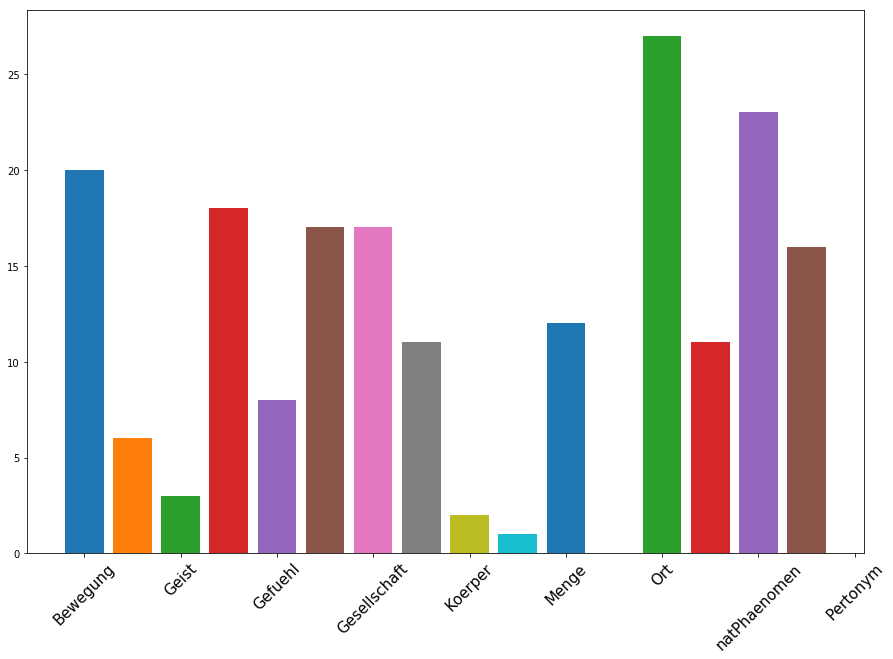

In [133]:
fig, ax = plt.subplots(figsize=(15,10))
for i, v in enumerate(data.values()):
    plt.bar(i, v)
ax.set_xticklabels(list(data.keys()),rotation=45,fontsize=15)

In [59]:
adt=[]
for element in a.values():
    adt.extend(element)

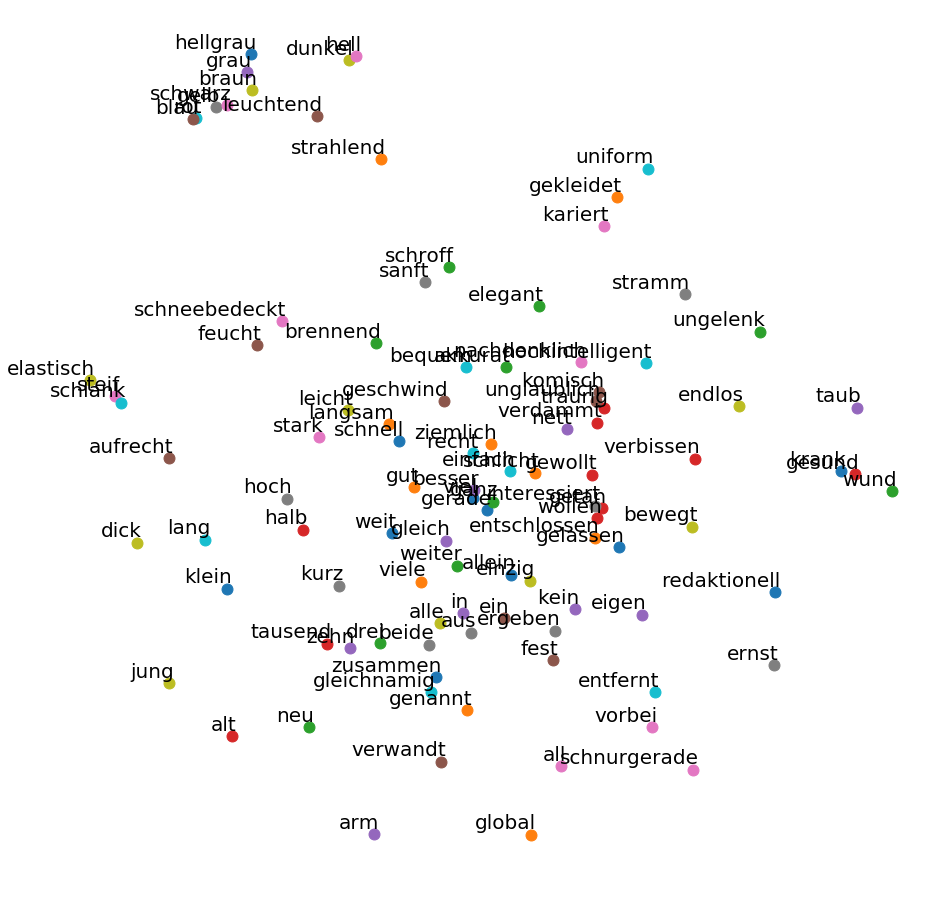

In [94]:
labels = []
tokens = []

for word in adt:
        tokens.append(word_vectors[word])
        labels.append(word)
    
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],s=120)
    plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',size=20)
plt.axis("off")
plt.show()

In [46]:
print([len(element) for element in a.values()])

[13, 3, 10, 5, 14, 7, 12, 1, 4, 4, 7, 6, 3, 5, 3, 4]


### Сушествительные:

In [47]:
nm,nv=get_new(noun_frame,noun_dict,emb_dict)

In [48]:
km=KMeans(n_clusters=23)

In [49]:
pred2=km.fit_predict(nm) #новая кластеризация

In [50]:
n=predictions(pred2,nv)

In [51]:
n

{0: ['arm',
  'essen',
  'bushaltestelle',
  'berg',
  'kleid',
  'baum',
  'stirn',
  'county',
  'reihe',
  'schlafsaal',
  'formel',
  'mg',
  'schiffchen',
  'tour',
  'regie',
  'wartebank',
  'park',
  'feuerball',
  'husten',
  'modell',
  'funk',
  'dschungel',
  'bein',
  'braut',
  'haus',
  'tom',
  'stufe',
  'pfund',
  'gespenst',
  'kokosnuss',
  'flanke',
  'windschutzscheibe',
  'general',
  'zufahrt',
  'stunde',
  'grill',
  'sergeant',
  'iris',
  'granate',
  'bahn',
  'drehbuch',
  'auge',
  'hemd',
  'haar',
  'jahr',
  'taxi',
  'meeresgrund',
  'pedal',
  'fahrbahn',
  'verein',
  'heimat',
  'abstand',
  'ohr',
  'arme',
  'bank',
  'bad',
  'familie',
  'training',
  'verfolger',
  'hai',
  'kebab',
  'code',
  'roman',
  'regen',
  'banane',
  'knopfloch',
  'forsthaus',
  'bester',
  'spritztour',
  'jen',
  'stadt',
  'politiker',
  'begabung',
  'bayer',
  'telefon',
  'soldat',
  'schaukel',
  'schwefel',
  'partner',
  'virus',
  'auto',
  'bayern',
  't

In [52]:
print([len(element) for element in n.values()])

[131, 138, 146, 159, 126, 128, 124, 143, 130, 165, 1, 141, 152, 121, 162, 121, 144, 139, 143, 127, 122, 130, 147]


### Глаголы:

In [53]:
vm,vv=get_new(verb_frame,verb_dict,emb_dict)

In [54]:
km=KMeans(n_clusters=15)

In [55]:
pred3=km.fit_predict(vm) #новая кластеризация

In [56]:
v=predictions(pred3,vv)

In [57]:
v #первый кластер- глаголы, связанные с говорением;7- с решением

{0: ['spielen',
  'bewegen',
  'verdammen',
  'nennen',
  'eilen',
  'bahnen',
  'einweisen',
  'heiraten',
  'schaukeln',
  'wirbeln',
  'erkennen',
  'sehen',
  'weisen',
  'holen',
  'drillen',
  'tagen',
  'fahren'],
 1: ['widersetzen',
  'sorgen',
  'verwirren',
  'anstrengen',
  'blicken',
  'haben',
  'denken',
  'teilen',
  'bleiben',
  'glauben',
  'meinen',
  'ausprobieren',
  'sinnen',
  'versprechen',
  'betrachten',
  'entschließen',
  'wissen',
  'erinnern',
  'können',
  'sortieren',
  'einreden'],
 2: ['rumlaufen',
  'rennen',
  'parken',
  'schweben',
  'reisen',
  'schlendern',
  'knien',
  'reiten',
  'triefen',
  'halsen',
  'rappeln',
  'gipfeln',
  'schnellen',
  'segeln',
  'geistern',
  'werfen',
  'stiefeln'],
 3: ['steifen', 'altern', 'putzen', 'sterben', 'verbeißen', 'kneifen'],
 4: ['schlafen', 'kranken', 'paaren', 'sonnen', 'haaren', 'weinen'],
 5: ['steigen',
  'hingehen',
  'klappen',
  'entfernen',
  'passieren',
  'weiten',
  'schreiten',
  'zubereiten'

In [58]:
print([len(element) for element in v.values()])

[17, 21, 17, 6, 6, 22, 5, 3, 7, 3, 5, 19, 1, 18, 5]


# Тесты с алгоритмами классификации:

In [ ]:
def classification(matrix,vector,alg):
    X_train,X_test,y_train,y_test=train_test_split(matrix,vector,train_size=0.7)
    alg.fit(X_train,y_train)
    predictions=alg.predict(X_test)
    
    accuracy=accuracy_score(y_test,predictions)
    f_sc=f1_score(y_test,predictions,average="macro")
    return accuracy,f_sc

## Прилагательные:

In [ ]:
for i in range(5,16): #Как и в других случаях, так и здесь попробуем классифицировать по кол-ву соседей
    clf=KNeighborsClassifier(n_neighbors=i,weights="distance")
    acc,f=classification(adj_matrix,adj_vector,clf)
    print(acc,f) 

In [ ]:
for i in range(40,50):
    gb=GradientBoostingClassifier(n_estimators=i)
    acc,f=classification(adj_matrix,adj_vector,gb)
    print(i," ",acc,f) 

In [ ]:
for i in range(50,53):
    gb=GradientBoostingClassifier(n_estimators=i)
    acc,f=classification(adj_matrix,adj_vector,gb)
    print(i," ",acc,f)

In [ ]:
for i in [0.1,0.2,0.3,0.4,0.5]:
    gb=GradientBoostingClassifier(n_estimators=47,learning_rate=i)
    acc,f=classification(verb_matrix,verb_vector,gb)
    print(acc,f) 

## Существительные:

In [ ]:
clf=KNeighborsClassifier(n_neighbors=5,weights="distance")
acc,f=classification(noun_matrix,noun_vector,clf)
print(acc,f) 

## Глаголы:

In [ ]:
for i in range(5,16): #Как и в других случаях, так и здесь попробуем классифицировать по кол-ву соседей
    clf=KNeighborsClassifier(n_neighbors=i,weights="distance")
    acc,f=classification(verb_matrix,verb_vector,clf)
    print(acc,f) 

In [ ]:
for i in range(41,50):
    gb=GradientBoostingClassifier(n_estimators=i)
    acc,f=classification(verb_matrix,verb_vector,gb)
    print(i," ",acc,f)

In [ ]:
for i in [0.1,0.2,0.3,0.4,0.5]:
    gb=GradientBoostingClassifier(n_estimators=43,learning_rate=i)
    acc,f=classification(verb_matrix,verb_vector,gb)
    print(acc,f) 